## Problem Statement
Make a system which tells whether the person will
be save from sinking. What factors were most likely
lead to success-socio-economic status, age, gender
and more.

## Importing required libraries

In [9]:
import warnings as warn
warn.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset


In [14]:
df = pd.read_csv("/content/titanic.csv")
# df = sns.load_dataset('titanic')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


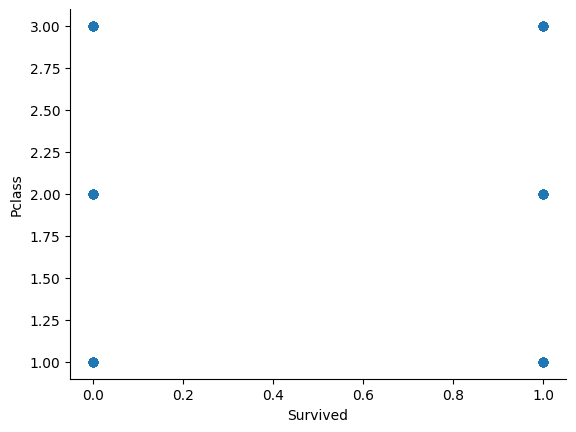

In [16]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Dataset Info

In [17]:

'''Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.'''


'Variable\tDefinition\tKey\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\nAge\tAge in years\nsibsp\t# of siblings / spouses aboard the Titanic\nparch\t# of parents / children aboard the Titanic\nticket\tTicket number\nfare\tPassenger fare\ncabin\tCabin number\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\nVariable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.'

## Discovering more about dataset

In [18]:
df.shape

(891, 12)

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Plotting some graphs to visualize data

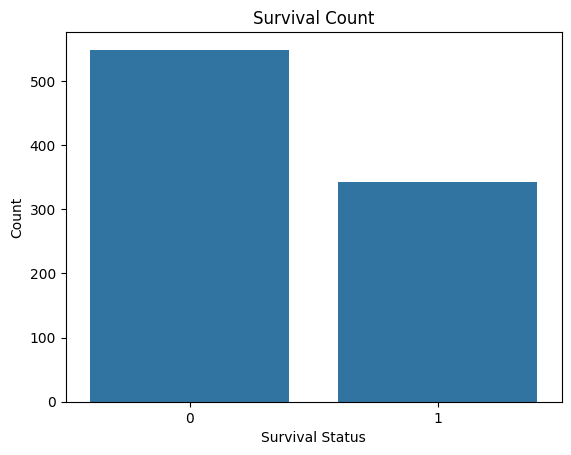

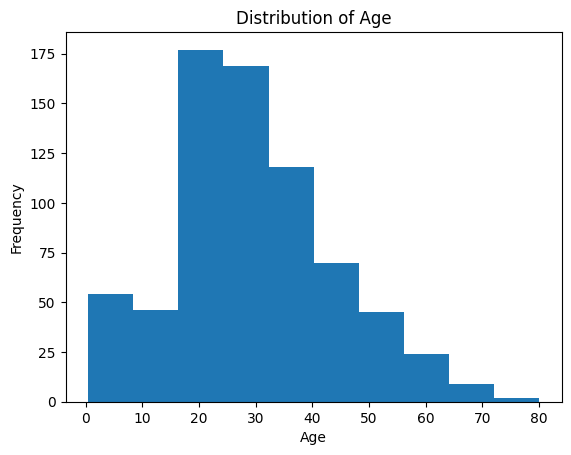

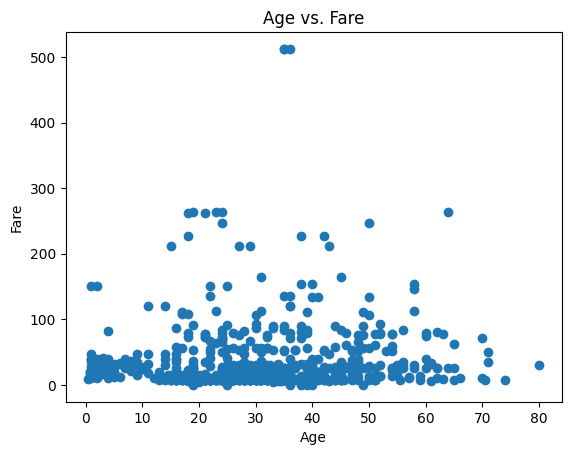

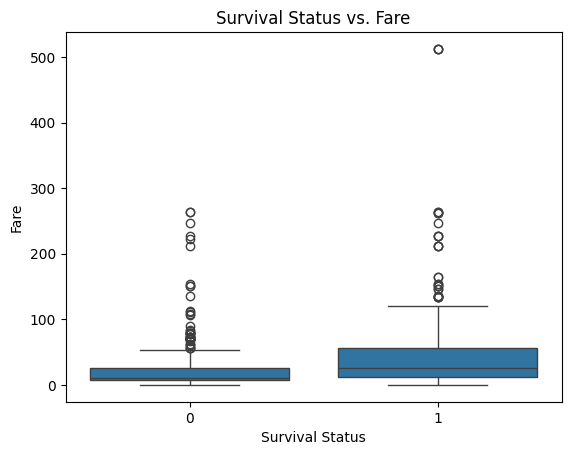

In [22]:
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

## Showing correlation b/w Age and Fare:

In [23]:
correlation = df[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


## Showing correlation b/w Survived and Pclass:

In [24]:
correlation = df[['Survived', 'Pclass']].corr()
print(correlation)

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


## Showing correlation b/w Survived and Fare:

In [25]:
correlation = df[['Survived', 'Fare']].corr()
print(correlation)

          Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000


## Removing Cabin from the columns as it is composed of more missing values

In [26]:
df.drop('Cabin',axis=1,inplace=True)

In [27]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## Removing Name from the columns as it has no significance in prediction

In [28]:
df.drop('Name',axis=1,inplace = True)

## Encoding Sex with numerical values

In [29]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

## Picking columns with numerical data

In [30]:
df1 = df[['Age','Fare','Sex','Fare','Pclass','SibSp','Parch','Survived']]

## Showing correlation among all numerical features

In [31]:
df1.corr()

,Age,Fare,Sex,Fare,Pclass,SibSp,Parch,Survived
Age,1.000000,0.096067,0.093254,0.096067,-0.369226,-0.308247,-0.189119,-0.077221
Fare,0.096067,1.000000,-0.182333,1.000000,-0.549500,0.159651,0.216225,0.257307
Sex,0.093254,-0.182333,1.000000,-0.182333,0.131900,-0.114631,-0.245489,-0.543351
Fare,0.096067,1.000000,-0.182333,1.000000,-0.549500,0.159651,0.216225,0.257307
Pclass,-0.369226,-0.549500,0.131900,-0.549500,1.000000,0.083081,0.018443,-0.338481
SibSp,-0.308247,0.159651,-0.114631,0.159651,0.083081,1.000000,0.414838,-0.035322
Parch,-0.189119,0.216225,-0.245489,0.216225,0.018443,0.414838,1.000000,0.081629
Survived,-0.077221,0.257307,-0.543351,0.257307,-0.338481,-0.035322,0.081629,1.000000


In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S


## Removing Ticket column as it shows no impact in prediction

In [33]:
df.drop('Ticket',inplace=True,axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


## Encoding Embarked columns into numerical values

In [35]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})

In [37]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


## Applying impation techniques for missing values of age

In [38]:
df.Age.isna().sum()

177

In [39]:
df2 = df.copy()

In [40]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

In [41]:
df3 = df.copy()

## Trying mean imputation for age column missing values

In [42]:
df2['Age'].fillna(mean_age,inplace=True)

In [43]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


## Dropping the missing rows due to embarked feature

In [44]:
df2.dropna(inplace=True)

## Getting started with model training



### Trying with Logistic Regression




In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

### Separating the target data and input data

In [47]:
 X = df2.drop('Survived',axis=1)
 y = df2['Survived']

### splitting the data into train data and test data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Fitting the logistic regression model with train and test data



In [50]:
model.fit(X_train,y_train)

LogisticRegression()

### Import accuracy metrics for survival classification task

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix

### Perfoming prediction




In [52]:
y_pred = model.predict(X_test)


### Calculating model accuracy






In [53]:
accuracy_score(y_test,y_pred)


0.8071748878923767

### Showing confusion matrix on predictions

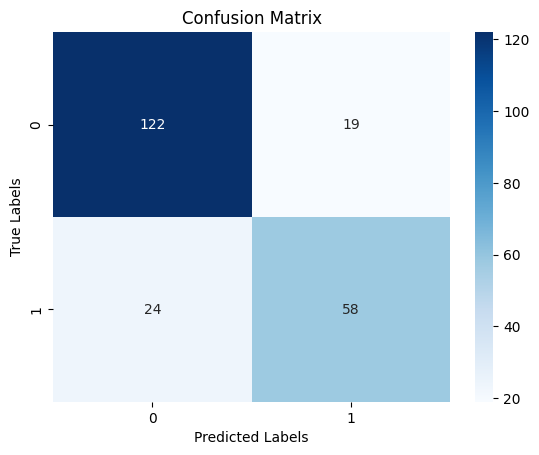

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### ROC curve

In [56]:
from sklearn.metrics import roc_curve, auc


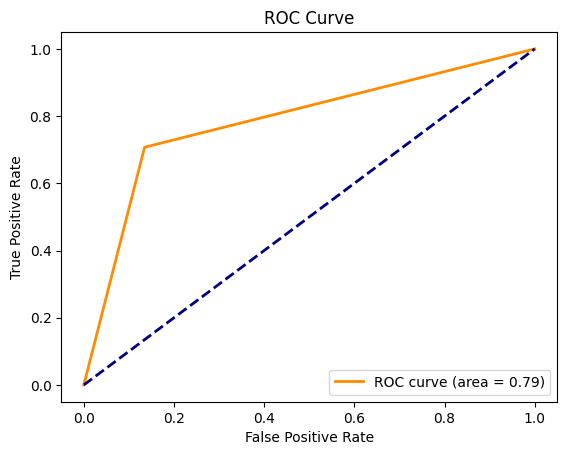

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Applying cross validation using grid seachcv

In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
model = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Accuracy Score: 0.7941598425696693


In [63]:
model = LogisticRegression(C=100, penalty='l2')

In [65]:
model.fit(X_train,y_train)

LogisticRegression(C=100)

In [68]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8071748878923767

### Showing Confusion matrix of preditions

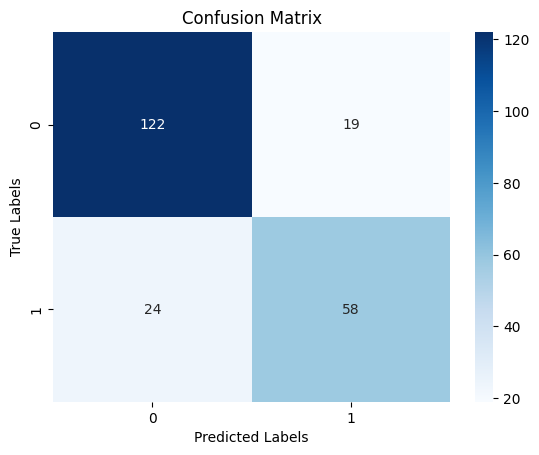

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ROC curve

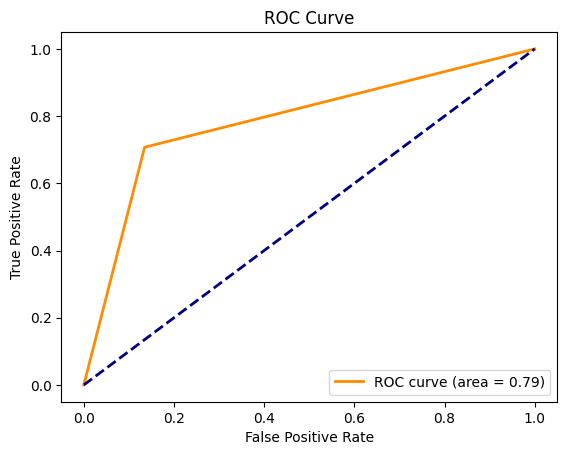

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Trying with Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestClassifier

### Fitting the random forest classifier model with train and test data

In [72]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Perfoming prediction




In [73]:
y_pred = model.predict(X_test)

### Calculating model accuracy





In [74]:
accuracy_score(y_test,y_pred)

0.7982062780269058

### Showing confusion matrix of predictions




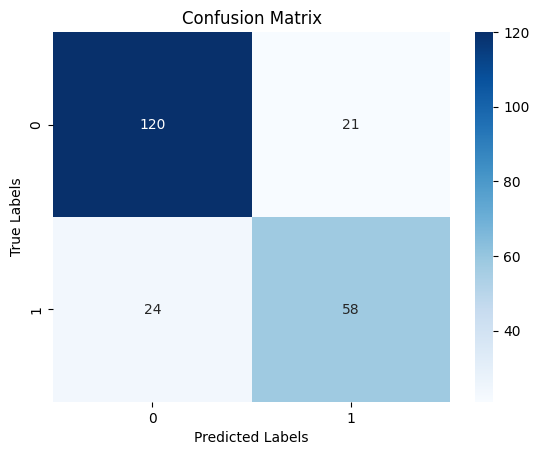

In [75]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### ROC curve

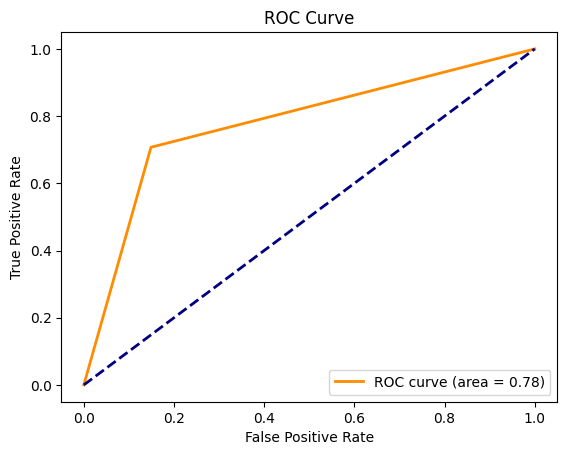

In [76]:

fpr, tpr, _ = roc_curve(y_test, y_pred)### Performing CrossValidation using grid seach cv
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Applying CrossValidtion using grid search cv

In [80]:
model = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(model, parameters, cv=2, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [81]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8243243243243243


In [86]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf = 1, min_samples_split =5, n_estimators=200)
model.fit(X_train,y_train)### Performing CrossValidation using grid seach cv

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [87]:
 y_pred = model.predict(X_test)
 accuracy_score(y_test,y_pred)

0.7982062780269058

### Showing Confusion matrix of preditions

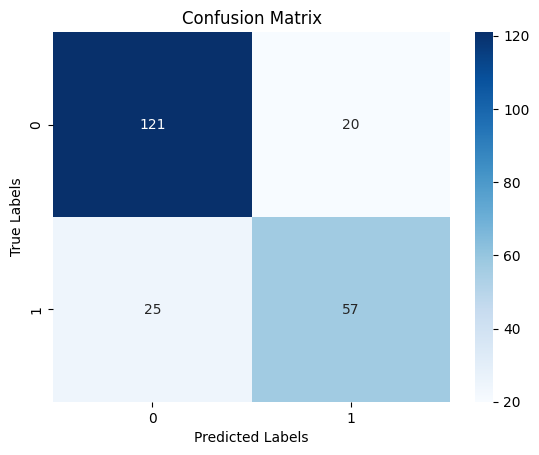

In [88]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### ROC curve

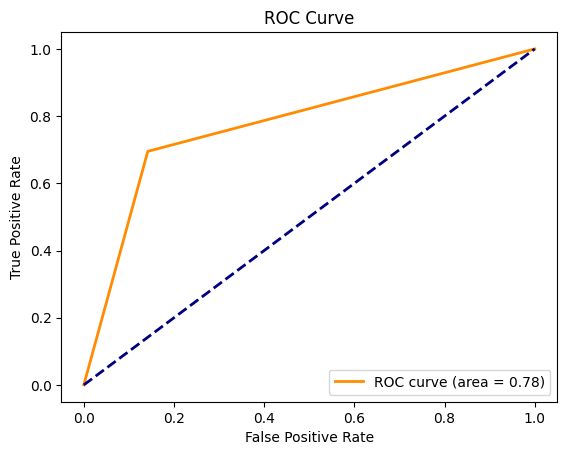

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Trying median imputation for age column missing values



In [99]:
df3['Age'] = df3['Age'].fillna(median_age)

In [104]:
df3.dropna(inplace=True)

## Separting the input data and the target data

In [105]:
 X = df3.drop('Survived',axis=1)
 y = df3['Survived']

## Splitting the data into train data and test data

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Getting started with model training


### Trying with logistic regression





In [107]:
model = LogisticRegression()

### Fitting the logistic regression model with train and test data


In [108]:
model.fit(X_train,y_train)

LogisticRegression()

### Perfoming prediction

In [109]:
y_pred = model.predict(X_test)

### Calculating model accuracy



In [110]:
accuracy_score(y_test,y_pred)

0.8071748878923767

### Showing confusion matrix of predictions


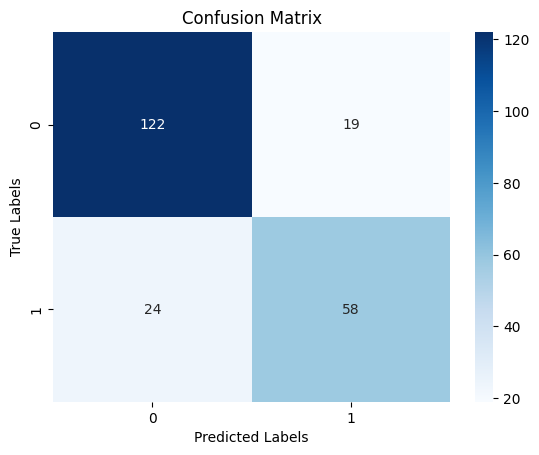

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### ROC curve

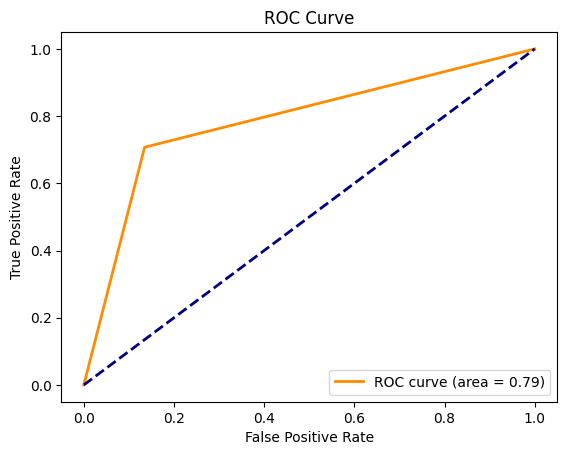

In [112]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Applying CrossValidation using GridSeach CV

In [113]:
model = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy Score: 0.7964387735669396


In [117]:
model = LogisticRegression(**grid_search.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8116591928251121

### Showing Confusion matrix of preditions

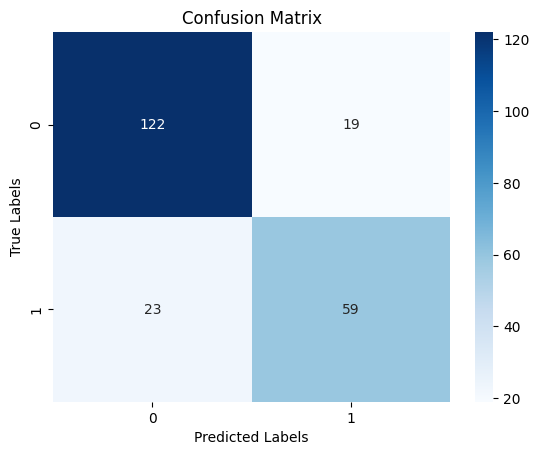

In [118]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ROC curve

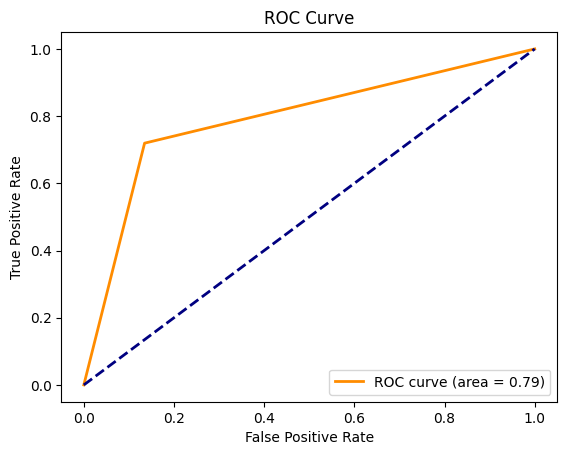

In [119]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Trying with Random Forest Classifier

In [120]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Performing prediction


In [121]:
y_pred = model.predict(X_test)

### Calculating model accuracy


In [122]:
accuracy_score(y_test,y_pred)

0.7892376681614349

### Showing confusion matrix of prediction

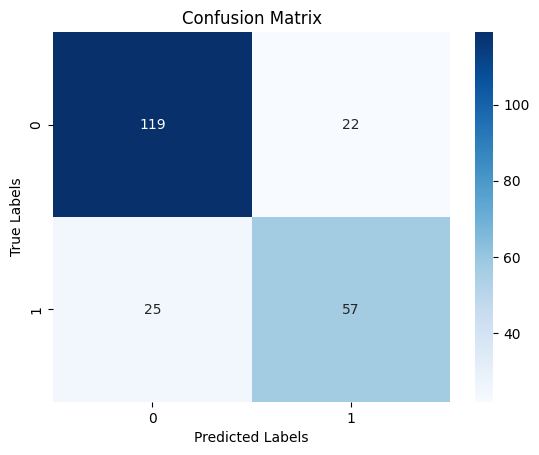

In [123]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



### ROC curve

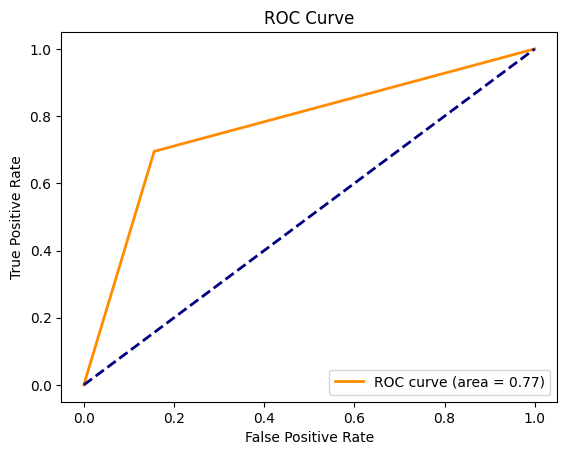

In [124]:

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Performing CrossValidation using grid seach cv

In [125]:
model = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(model, parameters, cv=2, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [127]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score: 0.8258258258258258


In [130]:
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7982062780269058

### Showing Confusion matrix of preditions

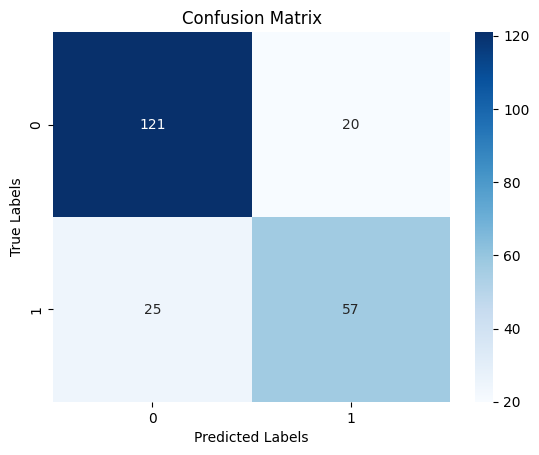

In [131]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### ROC curve

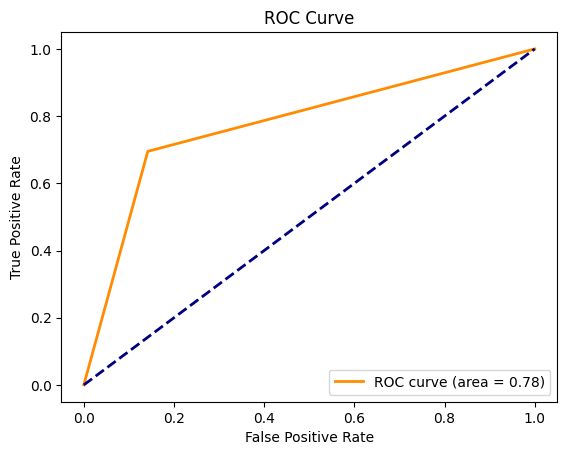

In [132]:

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()